In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
# 학생설명
# "https://raw.githubusercontent.com/haram4th/ADsP/main/student.txt"

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/student-mat.csv",encoding="utf-8",sep=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [19]:
df['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [22]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
# 가족과의 관계에 따른 성적
# 추가 수업,공부에 따른 성적
# 주거,거리에 따른 결석, 성적
# 알콜,건강에 따른 성적

In [40]:
# 가족과의 관계에 따른 성적 fam_df
fam_df = df.drop(['school', 'sex', 'age', 'address','reason','traveltime', 'studytime',
       'failures', 'schoolsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'freetime', 'goout', 'Dalc',
       'Walc', 'health',], axis=1)
fam_df

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,absences,G1,G2,G3
0,GT3,A,4,4,at_home,teacher,mother,no,4,6,5,6,6
1,GT3,T,1,1,at_home,other,father,yes,5,4,5,5,6
2,LE3,T,1,1,at_home,other,mother,no,4,10,7,8,10
3,GT3,T,4,2,health,services,mother,yes,3,2,15,14,15
4,GT3,T,3,3,other,other,father,yes,4,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,LE3,A,2,2,services,services,other,yes,5,11,9,9,9
391,LE3,T,3,1,services,services,mother,no,2,3,14,16,16
392,GT3,T,1,1,other,other,other,no,5,3,10,8,7
393,LE3,T,3,2,services,other,mother,no,4,0,11,12,10


In [53]:
fam_df2 = pd.get_dummies(fam_df,columns=["Pstatus","guardian","famsize","Mjob","Fjob","famsup"],drop_first=True)

In [44]:
from sklearn.model_selection import train_test_split

In [54]:
X = fam_df2.drop('G3', axis=1)
y = fam_df['G3']

In [55]:
X

,Medu,Fedu,famrel,absences,G1,G2,Pstatus_T,guardian_mother,guardian_other,famsize_LE3,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,famsup_yes
0,4,4,4,6,5,6,False,True,False,False,False,False,False,False,False,False,False,True,False
1,1,1,5,4,5,5,True,False,False,False,False,False,False,False,False,True,False,False,True
2,1,1,4,10,7,8,True,True,False,True,False,False,False,False,False,True,False,False,False
3,4,2,3,2,15,14,True,True,False,False,True,False,False,False,False,False,True,False,True
4,3,3,4,4,6,10,True,False,False,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,5,11,9,9,False,False,True,True,False,False,True,False,False,False,True,False,True
391,3,1,2,3,14,16,True,True,False,True,False,False,True,False,False,False,True,False,False
392,1,1,5,3,10,8,True,False,True,False,False,True,False,False,False,True,False,False,False
393,3,2,4,0,11,12,True,True,False,True,False,False,True,False,False,True,False,False,False


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [42]:
# 가족관계의 질
fam_df['famrel'].describe()

count    395.000000
mean       3.944304
std        0.896659
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

7.8354430379746836
0.5319851463353943


In [33]:
# 결석률
fam_df['absences'].unique()

array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17],
      dtype=int64)

<Axes: >

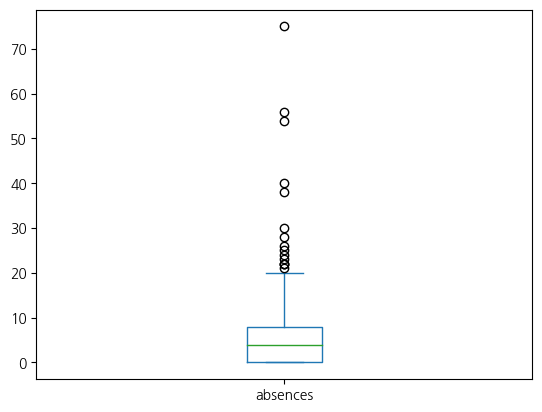

In [34]:
fam_df['absences'].plot(kind='box')

In [35]:
df[fam_df['absences'] == 75]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
276,GP,F,18,R,GT3,A,3,2,other,services,...,4,1,1,1,1,5,75,10,9,9
